#  TASK-2:Prediction using Un-supervised machine learning


##Importing libraries:

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

##Importing the dataset


In [23]:
iris_data = pd.read_csv('/content/Iris.csv')

# dropping the variables that are not important

iris_data.drop(['Id'],axis=1,inplace=True)

### Reading the dataset

In [24]:
# First five columns
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris_data.shape

(150, 5)

In [26]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
iris_data.drop_duplicates(inplace=True)

### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_data['Species']=le.fit_transform(iris_data['Species'])
iris_data['Species'].value_counts()

1    50
2    49
0    48
Name: Species, dtype: int64

### SepalLengthCm vs SepalWidthCm
>*we'll compare our final plot with this graph to check how accurate our model is*

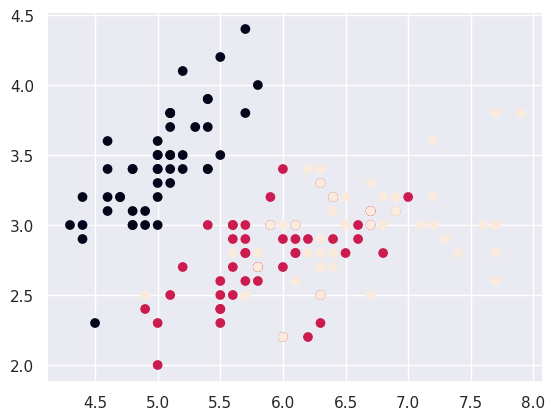

In [30]:
plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'],c=iris_data.Species.values)

### PetalLengthCm vs PetalWidthCm
>*we'll compare our final plot with this graph to check how accurate our model is*

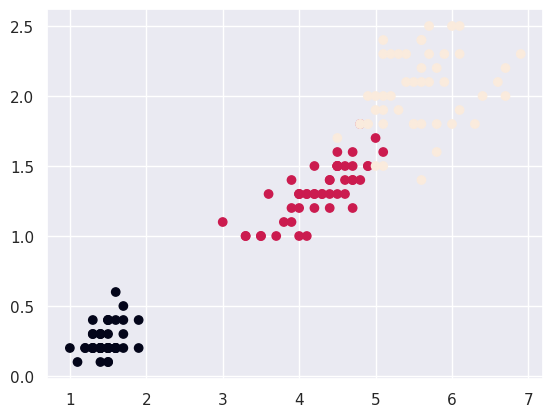

In [31]:
plt.scatter(iris_data['PetalLengthCm'],iris_data['PetalWidthCm'],c=iris_data.Species.values)

### Correlation

In [32]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058,0.782904
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883,0.948339
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


### Data Visualization

<Axes: >

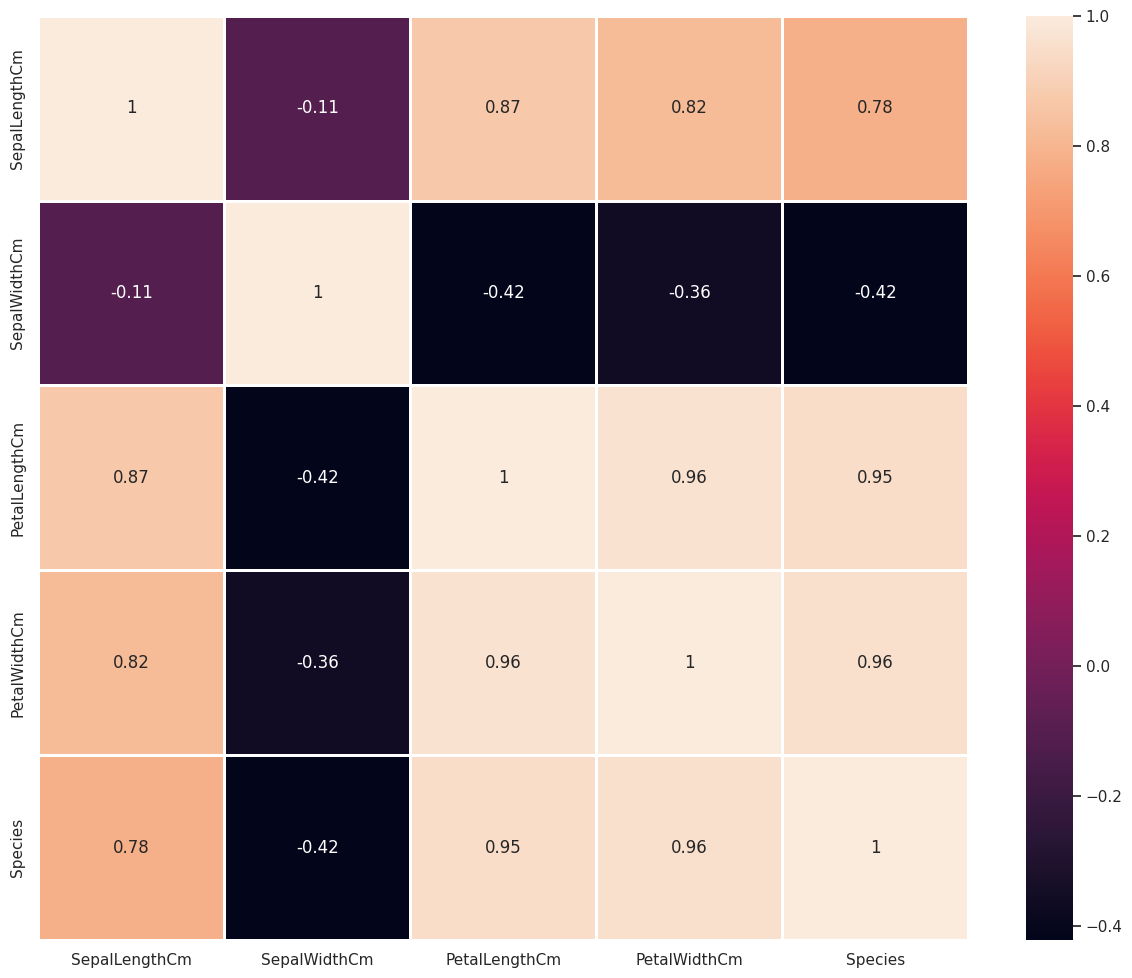

In [33]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(iris_data.corr(),linewidths=1,annot=True)

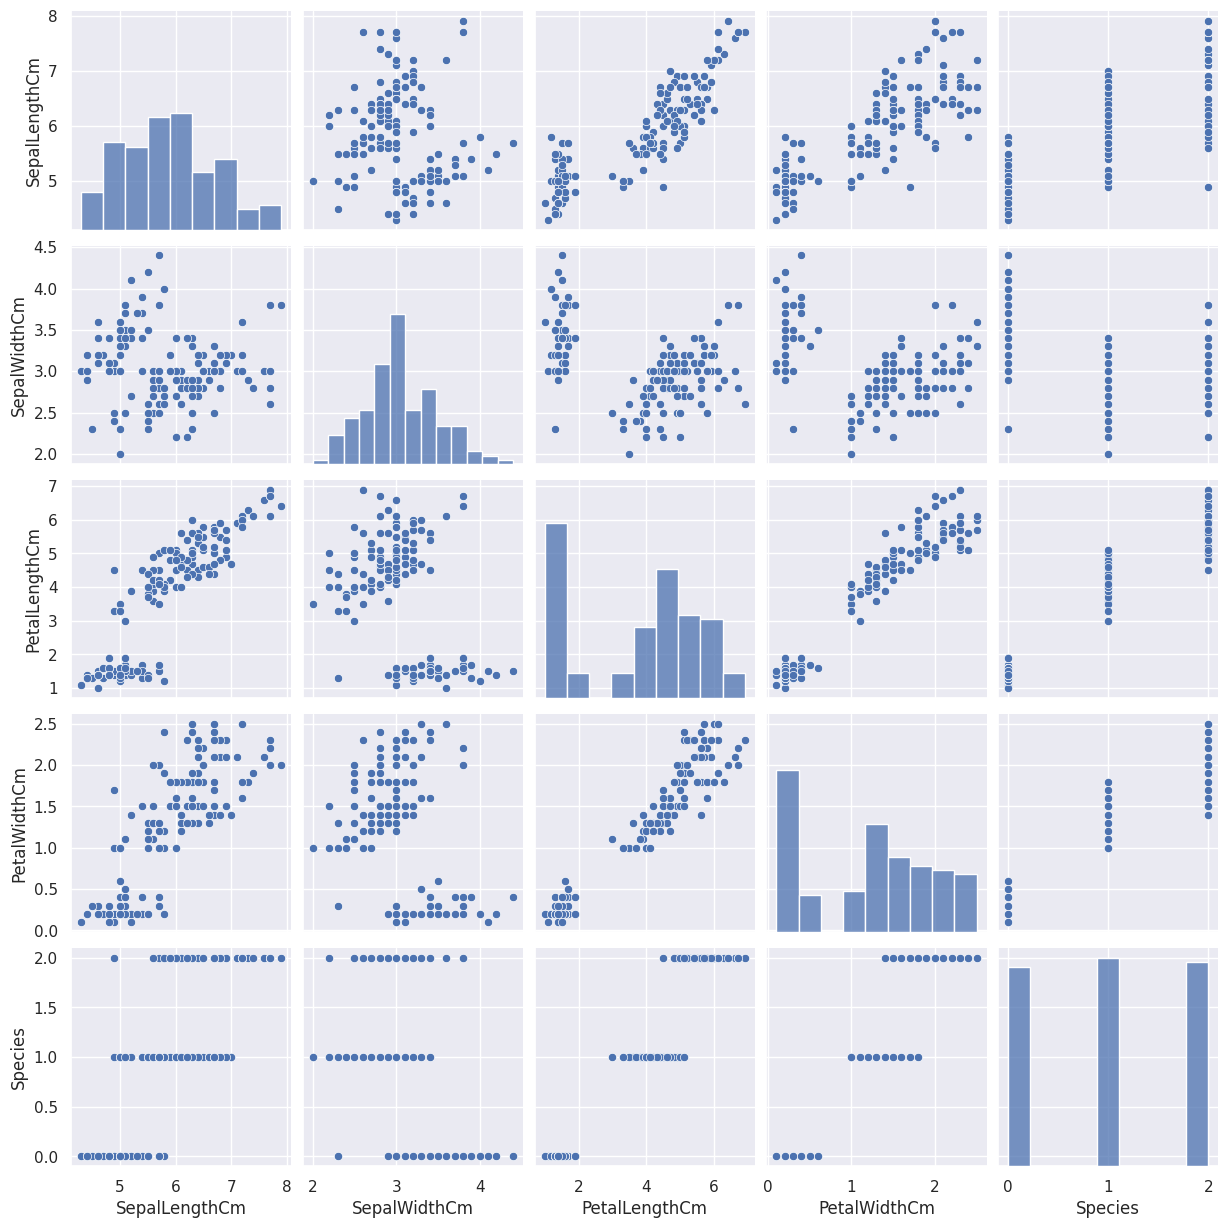

In [34]:
sns.pairplot(iris_data)


>We can see that Species is mainly depend on Petal Length and Petal Width.

>using petal_length and petal_width


In [36]:
iris = iris_data.iloc[:,[0,1,2,3]].values

### Elbow Method using within-cluster-sum-of-squares(wcss)

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)  # Set n_init explicitly
    kmeans.fit(iris)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

wcss


[663.895238095238,
 151.77145833333333,
 77.91989035087718,
 56.64237065018315,
 45.81642192982456,
 38.380978808131445,
 34.117070947570944,
 29.758015809726338,
 27.74499792038028,
 25.769652682285034]

### Using Elbow graph to find optimum no. of Clusters

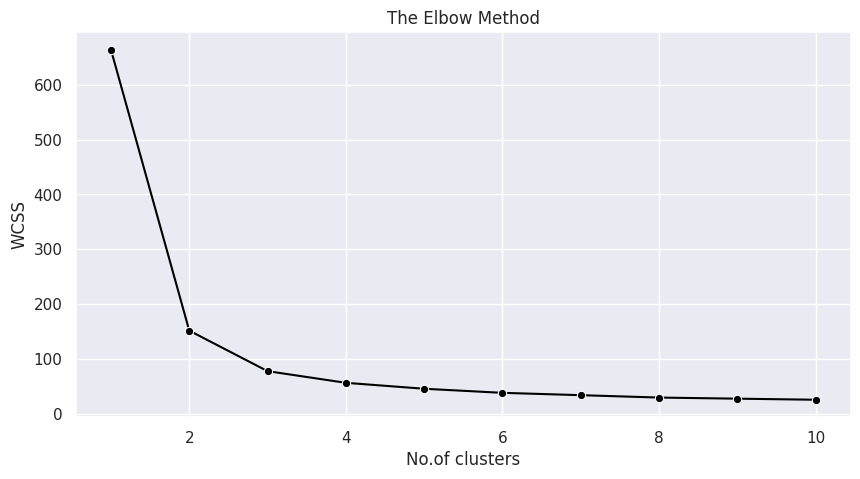

In [38]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.lineplot(x=range(1, 11), y=wcss, marker= 'o',color= 'black')
plt.title('The Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()


The optimal number of clusters (K) appears to be 3, as indicated by the elbow method. By examining the plot, we observe that as the number of clusters increases, the within-cluster sum of squares (WCSS) decreases. The selection of K is based on the rate of decrease in WCSS. In this case, the significant drop in WCSS is observed up to K=3, after which the reduction becomes minimal. Therefore, we identify K=3 as the point where the additional clustering does not provide substantial improvement in capturing the variance within the data.

### Initialization using K-means++

In [39]:
# Explicitly set the value of n_init
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 5, n_init=10)

# Fit the model and obtain cluster assignments
y_kmeans = kmeans.fit_predict(iris)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Clusters visualisation

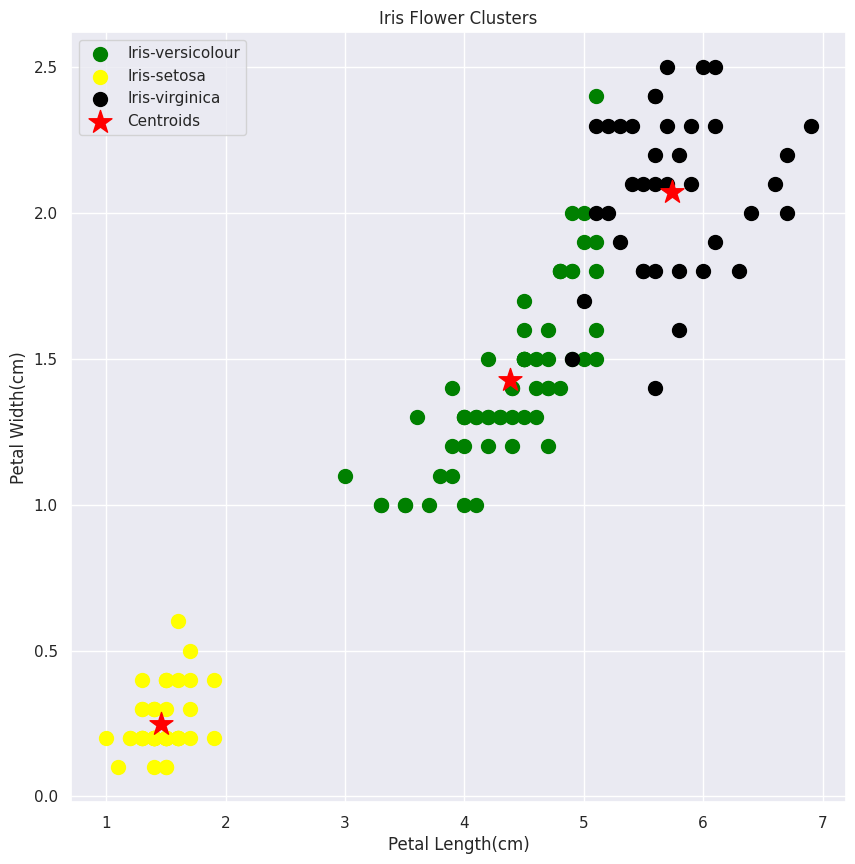

In [40]:
fig = plt.figure(figsize=(10, 10))
plt.title('Clusters with Centroids',fontweight ='bold', fontsize=18)
plt.scatter(iris[y_kmeans == 0, 2], iris[y_kmeans == 0, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(iris[y_kmeans == 1, 2], iris[y_kmeans == 1, 3], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(iris[y_kmeans == 2, 2], iris[y_kmeans == 2, 3],s = 100, c = 'black', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 300, c = 'red',marker='*',
            label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width(cm)')
plt.xlabel('Petal Length(cm)')
plt.legend()

The predicted graph closely resembles the actual one, indicating a strong alignment between the predicted and actual data. This similarity suggests that the chosen model, algorithm, or method used for prediction has effectively captured the underlying patterns present in the dataset. The degree of similarity between the predicted and actual graphs serves as an indication of the model's accuracy and its ability to replicate the observed trends or relationships in the data.

<h2>Task-3</h2> <br>

##Completed
###Mohamed Faris